##**Fundamentos para la Ciencia de Datos - Proyecto**

##**Predicción de Matriculado Deudor – Colegio de Ingenieros de la Provincia de Buenos Aires (CIPBA)**


## **Explicación del Data Set**

Los data set utilizados en en este proyecto de Data Science provienen del Colegio de Ingenieros de la Provincia de Buenos Aires y contiene información real de matriculados y su registro historico de pagos de cuotas de matricula.

En el contexto del proyecto, se considera que un matriculado está al día si tiene una cantidad de cuotas de deuda menor o igual a 1. Se considera potencial deudor si tiene exactamente 2 cuotas de deuda, y se considera deudor si tiene 3 o más cuotas de deuda.


## **Objetivo**
El objetivo principal es realizar un modelo supervisado de clasificación multiclase para predecir si un matriculado será deudor, potencial deudor o no deudor, utilizando variables de edad y distrito legal como características predictivas. Este enfoque busca ofrecer una herramienta predictiva que pueda ser útil para la gestión y planificación financiera de la institución

## **Conexión a los DataSets**

In [ ]:
import pandas as pd

# url del archivo activos.csv en GitHub
url_github = 'https://raw.githubusercontent.com/martingerbaldo/coder_ds2/015d11895bba685c7692a50793e46626c0b3d617/activos.csv'
matriculados = pd.read_csv(url_github, sep=';', header=0, encoding='latin1')
matriculados


,id_matriculado,fecha_ingreso,cuit,fecha_nacimiento,cp_real,localidad_real,distrito_legal,cant_cuotas_deuda
0,183,23/1/1951 00:00:00,20-04226821-7,17/5/1927 00:00:00,1057,CAPITAL FEDERAL,5,0
1,11801,29/11/1951 00:00:00,20-04227651-1,8/4/1928 00:00:00,1429,CAPITAL FEDERAL,7,4
2,344,25/9/1956 00:00:00,20-04088790-4,1/1/1933 00:00:00,1043,CAPITAL FEDERAL,2,0
3,426,7/4/1958 00:00:00,20-05130890-6,31/5/1931 00:00:00,1888,FCIO. VARELA,6,0
4,501,10/8/1959 00:00:00,23-04082953-9,17/6/1932 00:00:00,1017,CAPITAL FEDERAL,7,0
...,...,...,...,...,...,...,...,...
7531,38448,24/6/2024 00:00:00,27-26146458-1,20/10/1977 00:00:00,1233,CAPITAL FEDERAL,6,0
7532,38449,26/6/2024 00:00:00,27-40943035-5,10/11/1997 00:00:00,7400,OLAVARRIA,3,0
7533,38450,28/6/2024 00:00:00,27-32906831-0,26/11/1986 00:00:00,7600,MAR DEL PLATA,2,1
7534,38451,28/6/2024 00:00:00,23-35120343-9,21/12/1990 00:00:00,8000,BAHIA BLANCA,1,0


In [ ]:
# < ACLARACION IMPORTANTE: GitHub me limita la subida de archivos hasta 25 MB, por lo que el archivo mas pesado queda linkeado a Google Drive, el resto a GitHub>

# URL del archivo CSV en Google Drive
url_drive = 'https://drive.google.com/uc?export=download&id=15rqgdiQuc6P8jyGGtdHkoAQ_NXt-Wmh_'
cuotas = pd.read_csv(url_drive, sep=';', header=0, encoding='latin1')
# Muestro el DataFrame de Google Drive
cuotas


,id,id_matriculado,id_lote,importe,anio,trimestre,id_tipo_pago,fecha_pago
0,2052789,31267,26274.0,"266,66",2015,1,1,15/1/2015 00:00:00
1,2045896,35273,26075.0,"550,00",2014,3,1,17/10/2014 00:00:00
2,2050400,3764,26711.0,"580,00",2015,1,1,19/6/2015 00:00:00
3,929288,161,NaN,"30,00",1991,4,22,NaN
4,929289,161,NaN,"30,00",1992,1,22,NaN
...,...,...,...,...,...,...,...,...
1368953,2318995,22100,999999.0,"34167,00",2024,2,1,18/4/2024 00:00:00
1368954,2315920,5123,999999.0,"38647,00",2024,1,2,7/3/2024 00:00:00
1368955,2323397,6911,35567.0,"36407,00",2024,2,2,13/5/2024 00:00:00
1368956,2302894,23443,35567.0,"34167,00",2023,3,2,16/5/2024 00:00:00


In [ ]:
matriculados.head()

# **Análisis Exploratorio de Datos (EDA)**


***Manejo de nulos***


In [ ]:
# Verifico si hay nulos
matriculados.isnull().sum()


id_matriculado       0
fecha_ingreso        0
cuit                 0
fecha_nacimiento     1
cp_real              0
localidad_real       0
distrito_legal       0
cant_cuotas_deuda    0
estado_deuda         0
dtype: int64

In [ ]:
# Muestro la única fila con nulo en fecha de nacimiento
fila_nulos = matriculados[matriculados['fecha_nacimiento'].isnull()]
print(fila_nulos[['id_matriculado', 'fecha_nacimiento']])


      id_matriculado fecha_nacimiento
1018            6325              NaN


In [ ]:
# Como hay un unico registro nulo en fecha de nacimiento, puedo eliminar la fila dado que el impacto no seria significativo
matriculados = matriculados.dropna(subset=['fecha_nacimiento'])

# Verifico que ya no hayan quedado valores nulos en ninguna columna
matriculados.isnull().sum()



id_matriculado       0
fecha_ingreso        0
cuit                 0
fecha_nacimiento     0
cp_real              0
localidad_real       0
distrito_legal       0
cant_cuotas_deuda    0
estado_deuda         0
dtype: int64

***Readecuación de campos***


In [ ]:
# Eliminar la parte de tiempo de la columna fecha_nacimiento y fecha_ingreso
matriculados['fecha_nacimiento'] = matriculados['fecha_nacimiento'].str.split(' ').str[0]
matriculados['fecha_ingreso'] = matriculados['fecha_ingreso'].str.split(' ').str[0]

# Muestra el dataset con la columna 'fecha_nacimiento' ajustada
matriculados



<ipython-input-217-557ebbc178b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriculados['fecha_nacimiento'] = matriculados['fecha_nacimiento'].str.split(' ').str[0]
<ipython-input-217-557ebbc178b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriculados['fecha_ingreso'] = matriculados['fecha_ingreso'].str.split(' ').str[0]


,id_matriculado,fecha_ingreso,cuit,fecha_nacimiento,cp_real,localidad_real,distrito_legal,cant_cuotas_deuda,estado_deuda
0,183,23/1/1951,20-04226821-7,17/5/1927,1057,CAPITAL FEDERAL,5,0,no_deudor
1,11801,29/11/1951,20-04227651-1,8/4/1928,1429,CAPITAL FEDERAL,7,4,deudor
2,344,25/9/1956,20-04088790-4,1/1/1933,1043,CAPITAL FEDERAL,2,0,no_deudor
3,426,7/4/1958,20-05130890-6,31/5/1931,1888,FCIO. VARELA,6,0,no_deudor
4,501,10/8/1959,23-04082953-9,17/6/1932,1017,CAPITAL FEDERAL,7,0,no_deudor
...,...,...,...,...,...,...,...,...,...
7531,38448,24/6/2024,27-26146458-1,20/10/1977,1233,CAPITAL FEDERAL,6,0,no_deudor
7532,38449,26/6/2024,27-40943035-5,10/11/1997,7400,OLAVARRIA,3,0,no_deudor
7533,38450,28/6/2024,27-32906831-0,26/11/1986,7600,MAR DEL PLATA,2,1,no_deudor
7534,38451,28/6/2024,23-35120343-9,21/12/1990,8000,BAHIA BLANCA,1,0,no_deudor


***Agregados de campos necesarios para trabajar***

In [ ]:
import pandas as pd
from datetime import datetime

# Suponiendo que 'matriculados' es tu DataFrame con los datos
# Convierte la columna 'fecha_nacimiento' al formato de fecha adecuado
matriculados['fecha_nacimiento'] = pd.to_datetime(matriculados['fecha_nacimiento'], format='%d/%m/%Y')

# Convierte la columna 'fecha_ingreso' al formato de fecha adecuado
matriculados['fecha_ingreso'] = pd.to_datetime(matriculados['fecha_ingreso'], format='%d/%m/%Y')

# Calcula la edad a partir de 'fecha_nacimiento'
hoy = datetime.now()
matriculados['edad'] = hoy.year - matriculados['fecha_nacimiento'].dt.year

# Calcula la antigüedad a partir de 'fecha_ingreso'
matriculados['antigüedad'] = hoy.year - matriculados['fecha_ingreso'].dt.year

# Muestra las columnas 'fecha_nacimiento', 'edad' y 'antigüedad'
print(matriculados[['fecha_nacimiento', 'edad', 'fecha_ingreso', 'antigüedad', 'cant_cuotas_deuda']])



     fecha_nacimiento  edad fecha_ingreso  antigüedad  cant_cuotas_deuda
0          1927-05-17    97    1951-01-23          73                  0
1          1928-04-08    96    1951-11-29          73                  4
2          1933-01-01    91    1956-09-25          68                  0
3          1931-05-31    93    1958-04-07          66                  0
4          1932-06-17    92    1959-08-10          65                  0
...               ...   ...           ...         ...                ...
7531       1977-10-20    47    2024-06-24           0                  0
7532       1997-11-10    27    2024-06-26           0                  0
7533       1986-11-26    38    2024-06-28           0                  1
7534       1990-12-21    34    2024-06-28           0                  0
7535       1996-11-21    28    2024-06-28           0                  1

[7535 rows x 5 columns]


<ipython-input-218-93da350c1fe0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriculados['fecha_nacimiento'] = pd.to_datetime(matriculados['fecha_nacimiento'], format='%d/%m/%Y')
<ipython-input-218-93da350c1fe0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matriculados['fecha_ingreso'] = pd.to_datetime(matriculados['fecha_ingreso'], format='%d/%m/%Y')
<ipython-input-218-93da350c1fe0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [ ]:
matriculados

,id_matriculado,fecha_ingreso,cuit,fecha_nacimiento,cp_real,localidad_real,distrito_legal,cant_cuotas_deuda,estado_deuda,edad,antigüedad
0,183,1951-01-23,20-04226821-7,1927-05-17,1057,CAPITAL FEDERAL,5,0,no_deudor,97,73
1,11801,1951-11-29,20-04227651-1,1928-04-08,1429,CAPITAL FEDERAL,7,4,deudor,96,73
2,344,1956-09-25,20-04088790-4,1933-01-01,1043,CAPITAL FEDERAL,2,0,no_deudor,91,68
3,426,1958-04-07,20-05130890-6,1931-05-31,1888,FCIO. VARELA,6,0,no_deudor,93,66
4,501,1959-08-10,23-04082953-9,1932-06-17,1017,CAPITAL FEDERAL,7,0,no_deudor,92,65
...,...,...,...,...,...,...,...,...,...,...,...
7531,38448,2024-06-24,27-26146458-1,1977-10-20,1233,CAPITAL FEDERAL,6,0,no_deudor,47,0
7532,38449,2024-06-26,27-40943035-5,1997-11-10,7400,OLAVARRIA,3,0,no_deudor,27,0
7533,38450,2024-06-28,27-32906831-0,1986-11-26,7600,MAR DEL PLATA,2,1,no_deudor,38,0
7534,38451,2024-06-28,23-35120343-9,1990-12-21,8000,BAHIA BLANCA,1,0,no_deudor,34,0


In [ ]:
# Analizo la columna 'edad'
print(matriculados['edad'].describe())


count    7535.000000
mean       55.358593
std        13.239965
min        25.000000
25%        45.000000
50%        57.000000
75%        65.000000
max       164.000000
Name: edad, dtype: float64


In [ ]:
# Aca se puede notar que hay una edad maxima irreal, posiblemente un error de tipeo
# Seguramente sea un outlier que puede reflejarse en los graficos de mas abajo

***Manejo de Outliers***

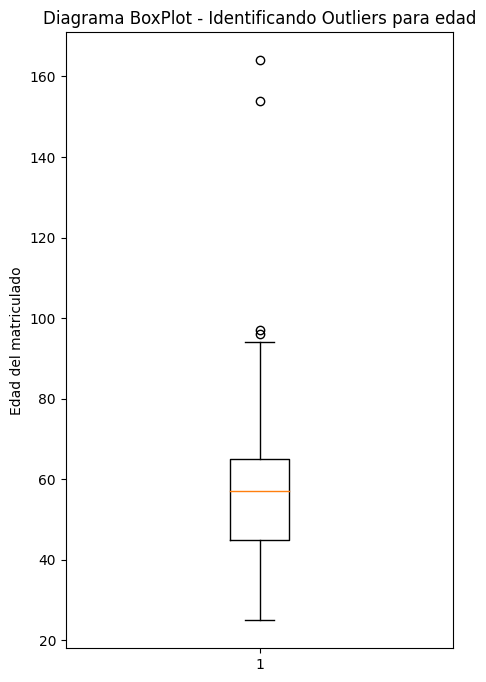

El/los siguiente/s matriculado/s posee/n una valor atipico en su campo edad:
      id_matriculado fecha_ingreso           cuit fecha_nacimiento  cp_real  \
0                183    1951-01-23  20-04226821-7       1927-05-17     1057   
1              11801    1951-11-29  20-04227651-1       1928-04-08     1429   
2249           21455    1995-04-26  20-13864047-8       1860-02-14     6640   
2857           23976    1999-07-22  20-21714073-1       1870-06-08     1714   

       localidad_real  distrito_legal  cant_cuotas_deuda estado_deuda  edad  \
0     CAPITAL FEDERAL               5                  0    no_deudor    97   
1     CAPITAL FEDERAL               7                  4       deudor    96   
2249          BRAGADO               4                  0    no_deudor   164   
2857        ITUZAINGO               7                  0    no_deudor   154   

      antigüedad  
0             73  
1             73  
2249          29  
2857          25  


In [ ]:
# Quiero verificar los outliers en la columna 'edad'
# importo matplotlib para graficar
# Trabajo con BloxPlot

import matplotlib.pyplot as plt

# defino los los intercuartiles
Q1 = matriculados['edad'].quantile(0.25)
Q3 = matriculados['edad'].quantile(0.75)
IQR = Q3 - Q1

# Defino los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Encuentro outliers
outliers = matriculados[(matriculados['edad'] < limite_inferior) | (matriculados['edad'] > limite_superior)]

# Creo un boxplot para visualizar los outliers
plt.figure(figsize=(5, 8))
plt.boxplot(matriculados['edad'])
plt.title('Diagrama BoxPlot - Identificando Outliers para edad')
# plt.xlabel('Matriculado')
plt.ylabel('Edad del matriculado')
plt.show()

# Muestro el/los outlier/s encontrado/s
print("El/los siguiente/s matriculado/s posee/n una valor atipico en su campo edad:")
print(outliers)


In [ ]:
# El grafico me muestra los valores atipicos, los cuales voy a reemplazar por el promedio de edad, solo aqoellos que son superiores a 150 (valor irreal)
# dejando los de 96 y 97 como posibles datos reales

# Calculo el promedio de las edades que no son outliers (menores o iguales a 170)
edad_promedio = matriculados.loc[matriculados['edad'] <= 170, 'edad'].mean()

# Reemplazo los valores de edad mayores a 150 con el promedio
matriculados.loc[matriculados['edad'] > 150, 'edad'] = edad_promedio


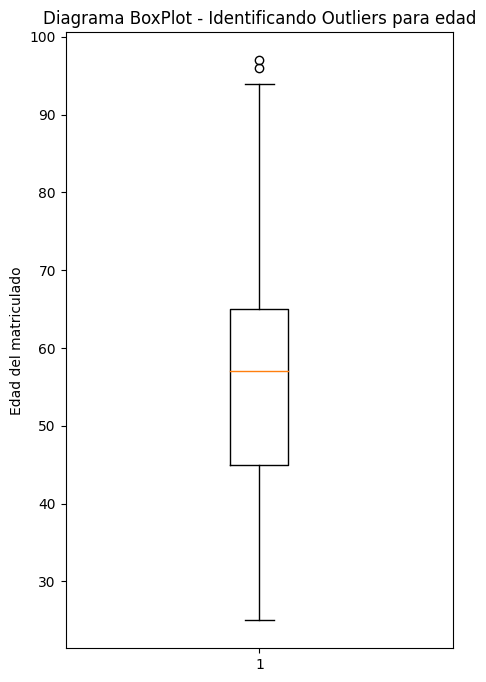

El/los siguiente/s matriculado/s podria/n poseer un valor atipico en su campo edad:
   id_matriculado fecha_ingreso           cuit fecha_nacimiento  cp_real  \
0             183    1951-01-23  20-04226821-7       1927-05-17     1057   
1           11801    1951-11-29  20-04227651-1       1928-04-08     1429   

    localidad_real  distrito_legal  cant_cuotas_deuda estado_deuda  edad  \
0  CAPITAL FEDERAL               5                  0    no_deudor  97.0   
1  CAPITAL FEDERAL               7                  4       deudor  96.0   

   antigüedad  
0          73  
1          73  


In [ ]:
# Muestro el grafico nuevamente

# defino los los intercuartiles
Q1 = matriculados['edad'].quantile(0.25)
Q3 = matriculados['edad'].quantile(0.75)
IQR = Q3 - Q1

# Defino los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Encuentro outliers
outliers = matriculados[(matriculados['edad'] < limite_inferior) | (matriculados['edad'] > limite_superior)]

# Creo un boxplot para visualizar los outliers
plt.figure(figsize=(5, 8))
plt.boxplot(matriculados['edad'])
plt.title('Diagrama BoxPlot - Identificando Outliers para edad')
# plt.xlabel('Matriculado')
plt.ylabel('Edad del matriculado')
plt.show()

# Muestro el/los outlier/s encontrado/s
print("El/los siguiente/s matriculado/s podria/n poseer un valor atipico en su campo edad:")
print(outliers)


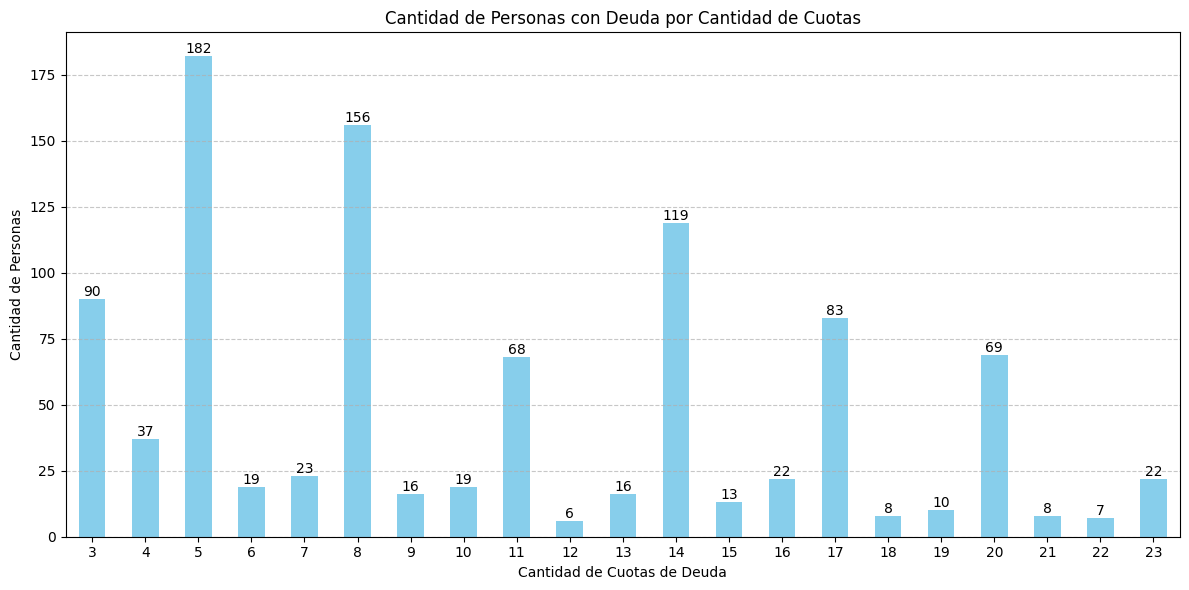

In [ ]:
# Filtro el DataFrame para incluir solo las filas donde cant_cuotas_deuda es mayor que 3
matriculados_deudores = matriculados[matriculados['cant_cuotas_deuda'] >= 3]

# Cuento la cantidad de personas que deben cada cantidad de cuotas
cuotas_counts = matriculados_deudores['cant_cuotas_deuda'].value_counts().sort_index()

# Creao un gráfico de barras
plt.figure(figsize=(12, 6))
cuotas_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Personas con Deuda por Cantidad de Cuotas')
plt.xlabel('Cantidad de Cuotas de Deuda')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar los valores encima de cada barra
for i, value in enumerate(cuotas_counts):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Lo llamativo de este cuadro, es que pega los picos cada 3 cuotas
# Dado que la matricula anual, a partir del año 2007 se generan en 3 cuotas por año

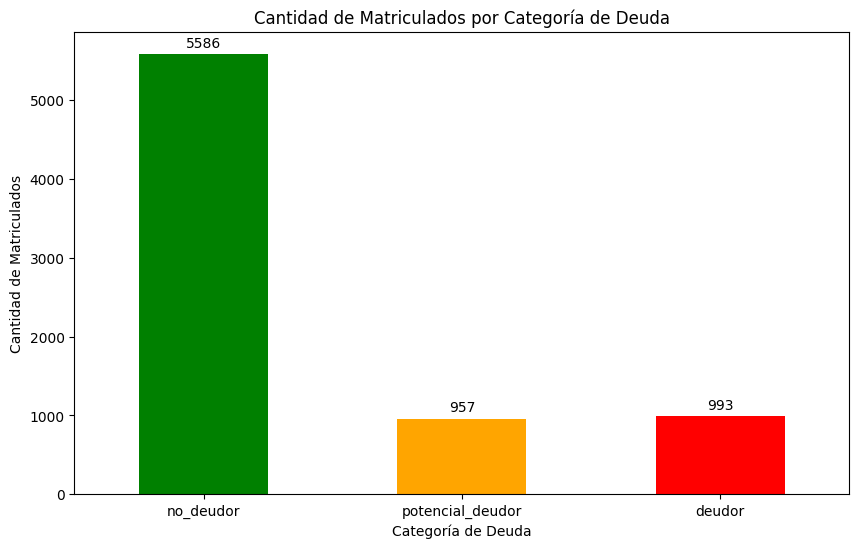

In [ ]:
# voy a crearle un campo adicional matriculaldos, con su estado de deuda, para ayudarme a categorizar
# ademas muestro la distribucion

import pandas as pd
import matplotlib.pyplot as plt

# Crear una nueva columna para las categorías
def categorizar_deudor(cuotas):
    if cuotas <= 1:
        return "no_deudor"
    elif cuotas == 2:
        return "potencial_deudor"
    else:
        return "deudor"

# Categorizar los matriculados y agregar la columna 'estado_deuda'
matriculados['estado_deuda'] = matriculados['cant_cuotas_deuda'].apply(categorizar_deudor)

# Contar la cantidad de cada categoría
categoria_counts = matriculados['estado_deuda'].value_counts()

# Reordenar las categorías para que 'potencial_deudor' quede en el medio
categoria_counts = categoria_counts.reindex(['no_deudor', 'potencial_deudor', 'deudor'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = categoria_counts.plot(kind='bar', color=['green', 'orange', 'red'])

# Colocar el número por encima de cada barra
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  xytext=(0, 8),  # 8 points vertical offset
                  textcoords='offset points',
                  ha='center', va='center')

plt.title('Cantidad de Matriculados por Categoría de Deuda')
plt.xlabel('Categoría de Deuda')
plt.ylabel('Cantidad de Matriculados')
plt.xticks(rotation=0)
plt.show()



In [ ]:
# Esto demuestra un punto critico en los matriculados que tienen mas de 60 años dado que estan proximos a jubilarse


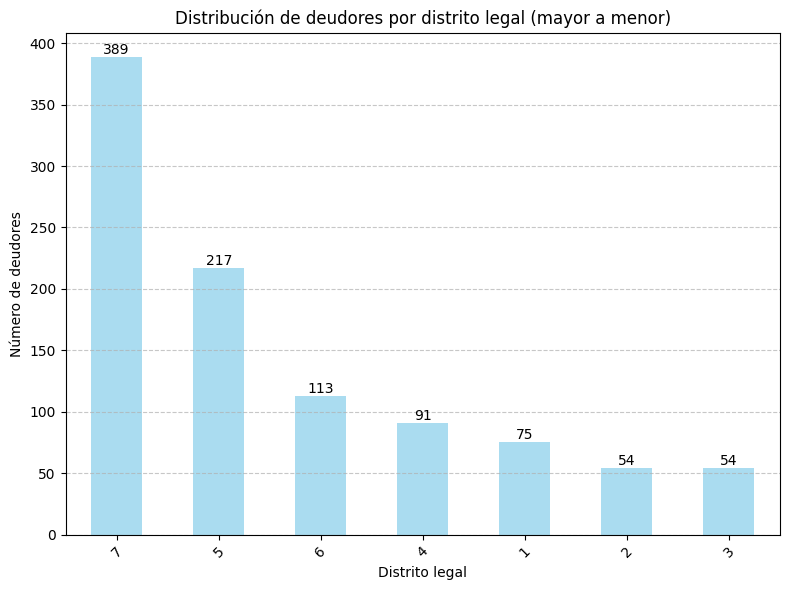

In [ ]:
# Agrupar por distrito_legal y contar el número de deudores
deudores_por_distrito = matriculados_deudores['distrito_legal'].value_counts().sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = deudores_por_distrito.plot(kind='bar', color='skyblue', alpha=0.7)  # Crear las barras

# Mostrar valores encima de cada barra
for barra, valor in enumerate(deudores_por_distrito):
    plt.text(barra, valor + 0.1, f'{valor}', ha='center', va='bottom', fontsize=10)  # Ajustar la posición y tamaño del texto

plt.title('Distribución de deudores por distrito legal (mayor a menor)')
plt.xlabel('Distrito legal')
plt.ylabel('Número de deudores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# trabajko un poco con los nulos
# tanto las columnas id_lote, como importe, no las necesito, por las podriamos eliminar
cuotas = cuotas.drop(columns=['id_lote', 'importe'])


In [ ]:
cuotas.isnull().sum()

id                     0
id_matriculado         0
anio                   0
trimestre              0
id_tipo_pago           0
fecha_pago        489466
dtype: int64

In [ ]:
# Realizar el merge por id_matriculado
historico_cuotas = pd.merge(cuotas, matriculados, on='id_matriculado', how='left')

# Ordenar por id_matriculado y fecha_pago para tener el histórico ordenado cronológicamente
historico_cuotas.sort_values(by=['id_matriculado', 'fecha_pago'], inplace=True)

# Mostrar el resultado
historico_cuotas

,id,id_matriculado,anio,trimestre,id_tipo_pago,fecha_pago,fecha_ingreso,cuit,fecha_nacimiento,cp_real,localidad_real,distrito_legal,cant_cuotas_deuda
1054567,2020572,1,2014,1,2,1/4/2014 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1057096,1995748,1,2013,2,2,1/4/2014 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829426,1789671,1,2007,2,2,11/6/2007 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
620548,1578691,1,2001,1,1,11/7/2001 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542856,1500103,1,1999,2,1,12/3/1999 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322810,2332059,38450,2024,3,10,NaN,28/6/2024 00:00:00,27-32906831-0,26/11/1986 00:00:00,7600.0,MAR DEL PLATA,2.0,1.0
1303485,2332060,38451,2024,2,1,28/6/2024 00:00:00,28/6/2024 00:00:00,23-35120343-9,21/12/1990 00:00:00,8000.0,BAHIA BLANCA,1.0,0.0
1322910,2332061,38451,2024,3,10,NaN,28/6/2024 00:00:00,23-35120343-9,21/12/1990 00:00:00,8000.0,BAHIA BLANCA,1.0,0.0
1303542,2332062,38452,2024,2,10,NaN,28/6/2024 00:00:00,27-39961792-3,21/11/1996 00:00:00,2900.0,SAN NICOLAS,4.0,1.0
